<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Попробуем-сбалансировать-взвешиванием" data-toc-modified-id="Попробуем-сбалансировать-взвешиванием-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Попробуем сбалансировать взвешиванием</a></span></li><li><span><a href="#Применим-увеличение-выборки-для-борьбы-с-дисбалансом" data-toc-modified-id="Применим-увеличение-выборки-для-борьбы-с-дисбалансом-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Применим увеличение выборки для борьбы с дисбалансом</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv('data.csv')

In [3]:
pd.set_option('display.max_columns', 50)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [6]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Как видим, пол является строчным типом данных, нужно будет с помощью техники прямого кодирования перевести его в дамми-переменные. Географическая принадлежность тоже строчная, кроме того имеет всего три уникальных значения, этот столбец тоже стоит перевести в дамми-переменную.

In [7]:
data = pd.get_dummies(data, drop_first = True, columns = ['Gender', 'Geography'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   Surname            10000 non-null  object 
 3   CreditScore        10000 non-null  int64  
 4   Age                10000 non-null  int64  
 5   Tenure             9091 non-null   float64
 6   Balance            10000 non-null  float64
 7   NumOfProducts      10000 non-null  int64  
 8   HasCrCard          10000 non-null  int64  
 9   IsActiveMember     10000 non-null  int64  
 10  EstimatedSalary    10000 non-null  float64
 11  Exited             10000 non-null  int64  
 12  Gender_Male        10000 non-null  uint8  
 13  Geography_Germany  10000 non-null  uint8  
 14  Geography_Spain    10000 non-null  uint8  
dtypes: float64(3), int64(8), object(1), uint8(3)
memory usage: 966.9+ KB


 Преобразовали

In [8]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.545700,0.250900,0.247700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.497932,0.433553,0.431698
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


Похоже, что к столбцам 'CreditScore', 'Balance', 'Estimated Salary' нужно будет применить масштабирование, чтобы избежать перекоса в значимости признаков.

In [9]:
data.isna().sum()

RowNumber              0
CustomerId             0
Surname                0
CreditScore            0
Age                    0
Tenure               909
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Exited                 0
Gender_Male            0
Geography_Germany      0
Geography_Spain        0
dtype: int64

Имеются пропуски в столбце 'Tenure'. Их меньше 10%, значит можно удалить строки с этими значениями

In [10]:
data = data.dropna(subset = ['Tenure'])
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Gender_Male          0
Geography_Germany    0
Geography_Spain      0
dtype: int64

Поскольку личные данные не влияют на прогноз ухода клиента из банка, то лучше удалить столбцы 'Surname' и 'CustomerID' из данных. Номер строки здесь тоже лишний, уберём и этот столбец.

In [12]:
data = data.drop(['Surname', 'CustomerId', 'RowNumber'], axis = 1)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1


## Исследование задачи

Поскольку цель задачи - прогноз ухода клиента из банка, то целевым признаком в нашем датасете будет столбец "Exitet". Разделим данные на target и features. Разделим выборку на тренировочную, валидационную и тестовую в пропорции 3:1:1

In [13]:

data_train, data_test_valid = train_test_split(data, test_size = 0.4, random_state = 12345)

In [14]:
features_train = data_train.drop('Exited', axis = 1)
target_train = data_train['Exited']

In [15]:
features_test_valid = data_test_valid.drop('Exited', axis = 1)
target_test_valid = data_test_valid['Exited']

In [16]:
features_valid, features_test, target_valid, target_test = train_test_split(features_test_valid, target_test_valid, test_size = 0.5, random_state = 12345)

Применю к столбцам 'CreditScore', 'Balance', 'Estimated Salary' масштабирование, чтобы избежать перекоса в значимости признаков.

In [17]:
list_of_sc = ['CreditScore', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[list_of_sc])

features_train[list_of_sc] = scaler.transform(features_train[list_of_sc])
features_valid[list_of_sc] = scaler.transform(features_valid[list_of_sc]) 
features_test[list_of_sc] = scaler.transform(features_test[list_of_sc])
print(features_train[list_of_sc].head())
pd.options.mode.chained_assignment = None

      CreditScore   Balance  EstimatedSalary
9344     0.809075  0.554904         0.019508
3796    -1.152518  0.480609         0.056167
7462    -0.398853 -1.237830         0.848738
1508    -0.749875 -1.237830        -0.894953
4478    -1.028628 -1.237830        -1.284516


/tmp/ipykernel_92/2021575078.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_valid[list_of_sc] = scaler.transform(features_valid[list_of_sc])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_92/2021575078.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


Обучим модель решающего дерева, подобрав оптимальную глубину

In [18]:

best_tree_f1 = 0
best_depth_tree = 0
for depth in range(1, 15):
    tree_model = DecisionTreeClassifier(max_depth = depth, random_state = 12345)
    tree_model.fit(features_train, target_train)
    tree_predicted = tree_model.predict(features_valid)
    tree_f1 = f1_score(target_valid, tree_predicted)
    if tree_f1 > best_tree_f1:
        best_tree_f1 = tree_f1
        best_depth_tree = depth

print("Лучшая глубина дерева:", best_depth_tree)
print("Лучшее качество:", best_tree_f1)

Лучшая глубина дерева: 7
Лучшее качество: 0.5773524720893142


Теперь обучим модель с оптимальными гиперпараметрами

In [19]:
tree_model = DecisionTreeClassifier(max_depth = 9, random_state = 12345)
tree_model.fit(features_train, target_train)
tree_predicted_valid = tree_model.predict(features_valid)

accuracy для нашей модели

In [20]:
accuracy_tree_valid = accuracy_score(target_valid, tree_predicted_valid)
print(accuracy_tree_valid)

0.8366336633663366


Посмотрим, какие у нашей модели метрики F1, Recall, Precision

In [21]:
print("F1 -", f1_score(target_valid, tree_predicted_valid))
print('Recall - ', recall_score(target_valid, tree_predicted_valid))
print('Precision - ', precision_score(target_valid, tree_predicted_valid))

F1 - 0.5437788018433181
Recall -  0.46949602122015915
Precision -  0.6459854014598541


Построим матрицу ошибок

In [22]:
print(confusion_matrix(target_valid, tree_predicted_valid))

[[1344   97]
 [ 200  177]]


Попробуем модель случайного леса. Подберём гиперпараметры

In [23]:
best_forest_f1 = 0
best_forest_estim = 0
best_forest_depth = 0
for depth in range(1, 11):
    for estim in range(50, 200, 10):
        forest_model = RandomForestClassifier(max_depth = depth, n_estimators = estim, random_state = 12345)
        forest_model.fit(features_train, target_train)
        forest_predicted_valid = forest_model.predict(features_valid)
        forest_f1 = f1_score(target_valid, forest_predicted_valid)
        if forest_f1 > best_forest_f1:
            best_forest_estim = estim
            best_forest_depth = depth
            best_forest_f1 = forest_f1
print("Лучшая глубина " , best_forest_depth)
print("Лучшее количество", best_forest_estim)
print("Лучшее качество", best_forest_f1)

Лучшая глубина  9
Лучшее количество 50
Лучшее качество 0.5831903945111492


Применим оптимальные параметры

In [24]:
forest_model = RandomForestClassifier(max_depth = best_forest_depth, n_estimators = best_forest_estim, random_state = 12345)
forest_model.fit(features_train, target_train)
forest_predicted_valid = forest_model.predict(features_valid)

accuracy для леса с оптимальными параметрами

In [25]:
accuracy_forest_valid = accuracy_score(target_valid, forest_predicted_valid)
print(accuracy_forest_valid)

0.8663366336633663


Смотрим метрики F1, Recall, Precision для леса

In [26]:
print("F1:", f1_score(target_valid, forest_predicted_valid))
print("Recall", recall_score(target_valid, forest_predicted_valid))
print("Precision", precision_score(target_valid, forest_predicted_valid))

F1: 0.5831903945111492
Recall 0.4509283819628647
Precision 0.8252427184466019


Матрица ошибок для случайного леса

In [27]:
print(confusion_matrix(target_valid, forest_predicted_valid))

[[1405   36]
 [ 207  170]]


логистическая регрессия

In [28]:
regression_model = LogisticRegression(random_state = 12345, solver = 'liblinear')
regression_model.fit(features_train, target_train)
regression_predicted_valid = regression_model.predict(features_valid)

accuracy для логистической регрессии

In [29]:
regression_accuracy = accuracy_score(target_valid, regression_predicted_valid)
print("Accuracy для регрессии:", regression_accuracy)

Accuracy для регрессии: 0.8091309130913091


Метрики F1, Recall, Precision для регрессии

In [30]:
print("F1:",f1_score(target_valid, regression_predicted_valid))
print("Recall", recall_score(target_valid, regression_predicted_valid))
print("Precision", precision_score(target_valid, regression_predicted_valid))

F1: 0.3046092184368738
Recall 0.20159151193633953
Precision 0.6229508196721312


матрица ошибок для регрессии

In [31]:
print(confusion_matrix(target_valid, regression_predicted_valid))

[[1395   46]
 [ 301   76]]


Вывод:
После изучения метрик случайного леса, решающего дерева и регрессии, можно прийти к выводу, что лучшее F1, Precision, Accuracy у случайного леса, в то время, как Recall выше у решающего дерева. К тому же, если изучить матрицы ошибок, становится понятно, что есть внушительный перекос в балансе классов.Значит, использование accuracy будет неинформативным.

## Борьба с дисбалансом

Проверим наличие дисбаланса по столбцу 'Exitet'

0    0.796062
1    0.203938
Name: Exited, dtype: float64


<AxesSubplot:>

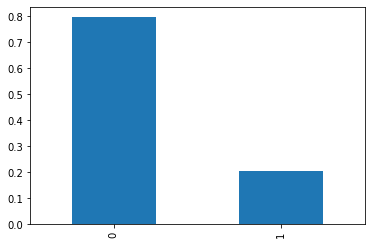

In [32]:
class_frequency = data['Exited'].value_counts(normalize = True)
print(class_frequency)
class_frequency.plot(kind = 'bar')

Как видим, есть достаточно большой дисбаланс по целевому признаку

### Попробуем сбалансировать взвешиванием

Сначала дерево решений

In [33]:
best_tree_f1_1 = 0
best_depth_tree1 = 0
for depth in range (1, 15):
    tree_model1 = DecisionTreeClassifier(max_depth = depth, random_state = 12345, class_weight='balanced')
    tree_model1.fit(features_train, target_train)
    tree_predicted1 = tree_model1.predict(features_valid)
    tree_f1_1 = f1_score(target_valid, tree_predicted1)
    if tree_f1_1 > best_tree_f1_1:
        best_tree_f1_1 = tree_f1_1
        best_depth_tree1 =  depth
print("Лучшая глубина взвешенного дерева:", best_depth_tree1)
print("Лучшее качество взвешенного дерева:", best_tree_f1_1)
    

Лучшая глубина взвешенного дерева: 5
Лучшее качество взвешенного дерева: 0.5735449735449736


обучим модель на лучшей глубине

In [34]:
tree_model_1 = DecisionTreeClassifier(max_depth = best_depth_tree1, random_state = 12345, class_weight = 'balanced')
tree_model_1.fit(features_train, target_train)
tree_predicted_1 = tree_model_1.predict(features_valid)

Посмотрим на метрики F1, Recall, Precision.

In [35]:
print("F1-tree  - ", f1_score(target_valid, tree_predicted_1))
print("Recall-tree", recall_score(target_valid, tree_predicted_1))
print("Precision-tree", precision_score(target_valid, tree_predicted_1))

F1-tree  -  0.5735449735449736
Recall-tree 0.7188328912466844
Precision-tree 0.477112676056338


Посчитаем AUC_ROC.

In [36]:
tree_probabilities_valid = tree_model_1.predict_proba(features_valid)
tree_probabilities_one_valid = tree_probabilities_valid[:, 1]

In [37]:
auc_roc = roc_auc_score(target_valid, tree_probabilities_one_valid)
print(auc_roc)

0.8396523192522141


Сделаем всё то же для случайного леса

In [38]:
forest_best_depth1 = 0
forest_best_estim1 = 0
forest_best_f1_1 = 0
for depth in range(1, 11):
    for est in range(50, 201, 10):
        forest_model1 = RandomForestClassifier(random_state = 12345, max_depth = depth, n_estimators = est, class_weight = 'balanced')
        forest_model1.fit(features_train, target_train)
        forest_predicted_valid = forest_model1.predict(features_valid)
        forest_f1_1 = f1_score(target_valid, forest_predicted_valid)
        if forest_best_f1_1 < forest_f1_1:
            forest_best_depth1 = depth
            forest_best_estim1 = est
print("Лучшая глубина дерева - ", forest_best_depth1)
print("Лучшее количество оценок - ", forest_best_estim1)

Лучшая глубина дерева -  10
Лучшее количество оценок -  200


применим гиперпараметры

In [39]:
forest_model_1 = RandomForestClassifier(random_state = 12345, n_estimators = forest_best_estim1, max_depth = forest_best_depth1, class_weight = 'balanced')
forest_model_1.fit(features_train, target_train)
forest_predicted_valid_1 = forest_model_1.predict(features_valid)

метрики F1, Recall, Precision для случайного леса

In [40]:
print("F1 - forest -", f1_score(target_valid, forest_predicted_valid_1))
print("Recall - forest -", recall_score(target_valid, forest_predicted_valid_1))
print("Precision - forest -", precision_score(target_valid, forest_predicted_valid_1))

F1 - forest - 0.6353887399463807
Recall - forest - 0.6286472148541115
Precision - forest - 0.6422764227642277


Построим ROC-кривую для случайного леса и изобразим её на графике, добавим график ROC-кривой случайной модели.
Посчитаем AUC_ROC.

In [41]:
forest_probabilities_valid = forest_model_1.predict_proba(features_valid)
forest_probabilities_one_valid = forest_probabilities_valid[:, 1]

In [42]:
auc_roc = roc_auc_score(target_valid, forest_probabilities_one_valid)
print(auc_roc)

0.8693141551788564


Логистическая регрессия

In [43]:
regression_model_1 = LogisticRegression(random_state = 12345, solver = 'liblinear', class_weight = 'balanced')
regression_model_1.fit(features_train, target_train)
regression_predicted_valid_1 = regression_model_1.predict(features_valid) 

метрики F1, Recall, Precision для логистической регрессии

In [44]:
print("F1 - regression -", f1_score(target_valid, regression_predicted_valid_1))
print("Recall - regression -", recall_score(target_valid, regression_predicted_valid_1))
print("Precision - regression -", precision_score(target_valid, regression_predicted_valid_1))

F1 - regression - 0.5101289134438306
Recall - regression - 0.7347480106100795
Precision - regression - 0.3906911142454161


Посчитаем AUC_ROC.

In [45]:
regression_probabilities_valid = regression_model_1.predict_proba(features_valid)
regression_probabilities_one_valid = regression_probabilities_valid[:, 1]

In [46]:
auc_roc = roc_auc_score(target_valid, regression_probabilities_one_valid)
print(auc_roc)

0.777527026803152


дерево решений до взвешивания:  
F1 - 0.5437788018433181  
Recall -  0.46949602122015915    
Precision -  0.6459854014598541   

после:      
F1-tree  -  0.5735449735449736   
Recall-tree 0.7188328912466844   
Precision-tree 0.477112676056338   
   
лес до взвешивания:     
F1: 0.5831903945111492   
Recall 0.4509283819628647   
Precision 0.8252427184466019   
после:      
F1 - forest - 0.6353887399463807   
Recall - forest - 0.6286472148541115   
Precision - forest - 0.6422764227642277   
   
регрессия до взвешивания:   
F1: 0.3046092184368738     
Recall 0.20159151193633953   
Precision 0.6229508196721312      
после:      
F1 - regression - 0.5101289134438306    
Recall - regression - 0.7347480106100795   
Precision - regression - 0.3906911142454161   

Если сравнивать модели до взвешивания и после, можно сказать, что во всех трёх случаях после взвешивания значительно улучшились показатели F1  и Recall. Наблюдается уменьшение метрики Precision, но, поскольку среднее гармоническое полноты и точность - F1 выросла, то можно сказать, что взвешивание положительно сказалось на результатах.

### Применим увеличение выборки для борьбы с дисбалансом

Поскольку отношение  класса "0" к классу "1" в пропорции 0,8 к 0,2, то для баланса необходимо увеличить класс "1" в четыре раза

Разделим обучающую выборку на отрицательные и положительные объекты. Скопируем  необходимое количество раз положительные объекты и создадим новую обучающую выборку, перемешаем данные. Для этого напишем функцию upsample

In [47]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones]*repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones]*repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state = 12345)
    
    return features_upsampled, target_upsampled

Вызовем функцию с необходимыми параметрами

In [48]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Смотрим на баланс

In [49]:
print(features_upsampled.shape)
print(target_upsampled.shape)

(8832, 11)
(8832,)


Обучим модели дерева решений, случайного леса и логистической регрессии. Посмотрим на метрики F1, Recall, Precision.Посчитаем AUC_ROC. 

Регрессия

In [50]:
regression_model = LogisticRegression(random_state = 12345, solver = 'liblinear')
regression_model.fit(features_upsampled, target_upsampled)
regression_predicted_valid = regression_model.predict(features_valid)


In [51]:
print("F1 для регрессии:", f1_score(target_valid, regression_predicted_valid))
print("Recall для регрессии:", recall_score(target_valid, regression_predicted_valid))
print("Precision для регрессии", precision_score(target_valid, regression_predicted_valid))

F1 для регрессии: 0.5072463768115941
Recall для регрессии: 0.7427055702917772
Precision для регрессии 0.38514442916093533


In [52]:
regression_probabilities_valid = regression_model.predict_proba(features_valid)
regression_provabilities_one_valid = regression_probabilities_valid[:,1]
print("ROC-AUC для регрессии", roc_auc_score(target_valid, regression_probabilities_one_valid))

ROC-AUC для регрессии 0.777527026803152


Дерево решений

In [53]:
best_tree_f1_2 = 0
best_depth_tree2 = 0
for depth in range (1, 15):
    tree_model2 = DecisionTreeClassifier(max_depth = depth, random_state = 12345)
    tree_model2.fit(features_upsampled, target_upsampled)
    tree_predicted2 = tree_model2.predict(features_valid)
    tree_f1_2 = f1_score(target_valid, tree_predicted2)
    if tree_f1_2 > best_tree_f1_2:
        best_tree_f1_2 = tree_f1_2
        best_depth_tree2 =  depth
print("Лучшая глубина увеличенного дерева:", best_depth_tree2)
print("Лучшее качество увеличенного дерева:", best_tree_f1_2)

Лучшая глубина увеличенного дерева: 5
Лучшее качество увеличенного дерева: 0.5735449735449736


In [54]:
tree_model_2 = DecisionTreeClassifier(max_depth = best_depth_tree2, random_state = 12345)
tree_model_2.fit(features_upsampled, target_upsampled)
tree_predicted_2 = tree_model_2.predict(features_valid)

In [55]:
print("F1-tree  -  ", f1_score(target_valid, tree_predicted_2))
print("Recall-tree", recall_score(target_valid, tree_predicted_2))
print("Precision-tree", precision_score(target_valid, tree_predicted_2))

F1-tree  -   0.5735449735449736
Recall-tree 0.7188328912466844
Precision-tree 0.477112676056338


In [56]:
tree_probabilities_valid_2 = tree_model_2.predict_proba(features_valid)
tree_probabilities_one_valid_2 = tree_probabilities_valid_2[:, 1]

In [57]:
auc_roc = roc_auc_score(target_valid, tree_probabilities_one_valid_2)
print("AUC-ROC-tree", auc_roc)

AUC-ROC-tree 0.8396523192522141


Случайный лес

In [58]:
forest_best_depth2 = 0
forest_best_estim2 = 0
forest_best_f1_2 = 0
for depth in range(1, 11):
    for est in range(50, 201, 10):
        forest_model2 = RandomForestClassifier(random_state = 12345, max_depth = depth, n_estimators = est)
        forest_model2.fit(features_upsampled, target_upsampled)
        forest_predicted_valid_2 = forest_model2.predict(features_valid)
        forest_f1_2 = f1_score(target_valid, forest_predicted_valid_2)
        if forest_best_f1_2 < forest_f1_2:
            forest_best_depth2 = depth
            forest_best_estim2 = est
print("Лучшая глубина дерева - ", forest_best_depth2)
print("Лучшее количество оценок - ", forest_best_estim2)

Лучшая глубина дерева -  10
Лучшее количество оценок -  200


In [59]:
forest_model_2 = RandomForestClassifier(random_state = 12345, n_estimators = forest_best_estim2, max_depth = forest_best_depth2)
forest_model_2.fit(features_upsampled, target_upsampled)
forest_predicted_valid_2 = forest_model_2.predict(features_valid)

In [60]:
print("F1 - forest для увеличенного леса", f1_score(target_valid, forest_predicted_valid_2))
print("Recall - forest для увеличенного леса", recall_score(target_valid, forest_predicted_valid_2))
print("Precision - forest для увеличенного леса", precision_score(target_valid, forest_predicted_valid_2))

F1 - forest для увеличенного леса 0.6272189349112426
Recall - forest для увеличенного леса 0.7029177718832891
Precision - forest для увеличенного леса 0.5662393162393162


In [61]:
forest_probabilities_valid_2 = forest_model_2.predict_proba(features_valid)
forest_probabilities_one_valid_2 = forest_probabilities_valid_2[:, 1]

In [62]:

auc_roc = roc_auc_score(target_valid, forest_probabilities_one_valid_2)
print("ROC-AUC для увеличенного случайного леса", auc_roc)

ROC-AUC для увеличенного случайного леса 0.8682409982752177


дерево решений до увеличения:  
F1 - 0.5437788018433181  
Recall -  0.46949602122015915    
Precision -  0.6459854014598541   

после взвешивания:      
F1-tree  -  0.5735449735449736   
Recall-tree 0.7188328912466844   
Precision-tree 0.477112676056338  

после увеличения:
F1-tree  -   0.5735449735449736
Recall-tree 0.7188328912466844
Precision-tree 0.477112676056338
   
лес до увеличения:     
F1: 0.5831903945111492   
Recall 0.4509283819628647   
Precision 0.8252427184466019   
после взвешивания:      
F1 - forest - 0.6353887399463807   
Recall - forest - 0.6286472148541115   
Precision - forest - 0.6422764227642277  

после увеличения:   
F1 - forest для увеличенного леса 0.6272189349112426
Recall - forest для увеличенного леса 0.7029177718832891
Precision - forest для увеличенного леса 0.5662393162393162
   
регрессия до увеличения:   
F1: 0.3046092184368738     
Recall 0.20159151193633953   
Precision 0.6229508196721312   

после взвешивания:      
F1 - regression - 0.5101289134438306    
Recall - regression - 0.7347480106100795   
Precision - regression - 0.3906911142454161 

после увеличения:   
F1 для регрессии: 0.5072463768115941
Recall для регрессии: 0.7427055702917772
Precision для регрессии 0.3851444291609353

Если сравнивать модели до увеличения и после, можно сказать, что во всех трёх случаях после увеличения, также как и после взвешивания, улучшились показатели F1  и Recall и уменьшилась Precision, но F1 выросла, то есть увеличение положительно сказалось на результатах.   
Если сравнивать увеличение с взвешиванием, то можно сказать, что ощутимая разница заметна только для случайного леса, где Recall выше у увеличенного леса, а Precision - у взвешенного.


Разделим обучающую выборку на отрицательные и положительные объекты. Случайным образом отбросим часть из отрицательных объектов, создадим новую выборку, перемешаем данные. Для этого напишем функцию downsample

In [63]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_once = features[target == 1]
    target_zeros = target[target == 0]
    target_once = target[target == 1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac = fraction, random_state  = 12345)] + [features_once])
    target_downsampled = pd.concat([target_zeros.sample(frac = fraction, random_state = 12345)]+[target_once])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state = 12345)
    
    return features_downsampled, target_downsampled

In [64]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

Посмотрим на баланс

In [65]:
print(features_downsampled.shape)
print(target_downsampled.shape)

(2208, 11)
(2208,)


Регрессия для уменьшенной выборки

In [66]:
regression_model_3 = LogisticRegression(random_state = 12345, solver = 'liblinear')
regression_model_3.fit(features_downsampled, target_downsampled)
regression_predicted_valid_3= regression_model_3.predict(features_valid)


In [67]:
print("F1 для уменьшенной регрессии:", f1_score(target_valid, regression_predicted_valid_3))
print("Recall для уменьшенной регрессии:", recall_score(target_valid, regression_predicted_valid_3))
print("Precision для уменьшенной регрессии:", precision_score(target_valid, regression_predicted_valid_3))

F1 для уменьшенной регрессии: 0.5035971223021583
Recall для уменьшенной регрессии: 0.7427055702917772
Precision для уменьшенной регрессии: 0.38095238095238093


In [68]:
probabilities_valid_3 = regression_model_3.predict_proba(features_valid)
probabilities_one_valid_3 = probabilities_valid_3[:, 1]
print("ROC-AUC_log:", roc_auc_score(target_valid, probabilities_one_valid_3))

ROC-AUC_log: 0.7756623476549774


Дерево решений для уменьшенной выборки

In [69]:
best_tree_f1_3 = 0
best_depth_tree3 = 0
for depth in range (1, 15):
    tree_model3 = DecisionTreeClassifier(max_depth = depth, random_state = 12345)
    tree_model3.fit(features_downsampled, target_downsampled)
    tree_predicted3 = tree_model3.predict(features_valid)
    tree_f1_3 = f1_score(target_valid, tree_predicted3)
    if tree_f1_3 > best_tree_f1_3:
        best_tree_f1_3 = tree_f1_3
        best_depth_tree3 =  depth
print("Лучшая глубина уменьшенного дерева:", best_depth_tree3)
print("Лучшее качество уменьшенного дерева:", best_tree_f1_3)

Лучшая глубина уменьшенного дерева: 6
Лучшее качество уменьшенного дерева: 0.5636704119850188


In [70]:
tree_model_3 = DecisionTreeClassifier(max_depth = best_depth_tree3, random_state = 12345)
tree_model_3.fit(features_downsampled, target_downsampled)
tree_predicted_3 = tree_model_3.predict(features_valid)

In [71]:
print("F1-tree уменьшенное-  ", f1_score(target_valid, tree_predicted_3))
print("Recall-tree уменьшунное", recall_score(target_valid, tree_predicted_3))
print("Precision-tree уменьшенное", precision_score(target_valid, tree_predicted_3))

F1-tree уменьшенное-   0.5636704119850188
Recall-tree уменьшунное 0.7984084880636605
Precision-tree уменьшенное 0.4356005788712012


In [72]:
tree_probabilities_valid_3 = tree_model_3.predict_proba(features_valid)
tree_probabilities_one_valid_3 = tree_probabilities_valid_3[:, 1]

In [73]:
auc_roc = roc_auc_score(target_valid, tree_probabilities_one_valid_3)
print("AUC-ROC-tree уменьшенное", auc_roc)

AUC-ROC-tree уменьшенное 0.8343500405885245


Случайный лес для уменьшенной выборки

In [74]:
forest_best_depth3 = 0
forest_best_estim3 = 0
forest_best_f1_3 = 0
for depth in range(1, 11):
    for est in range(50, 201, 10):
        forest_model3 = RandomForestClassifier(random_state = 12345, max_depth = depth, n_estimators = est)
        forest_model3.fit(features_downsampled, target_downsampled)
        forest_predicted_valid_3 = forest_model3.predict(features_valid)
        forest_f1_3 = f1_score(target_valid, forest_predicted_valid_3)
        if forest_best_f1_3 < forest_f1_3:
            forest_best_depth3 = depth
            forest_best_estim3 = est
print("Лучшая глубина уменьшенного дерева - ", forest_best_depth3)
print("Лучшее количество оценок уменьшенного дерева- ", forest_best_estim3)

Лучшая глубина уменьшенного дерева -  10
Лучшее количество оценок уменьшенного дерева-  200


In [75]:
forest_model_3 = RandomForestClassifier(random_state = 12345, n_estimators = forest_best_estim3, max_depth = forest_best_depth3)
forest_model_3.fit(features_downsampled, target_downsampled)
forest_predicted_valid_3 = forest_model_3.predict(features_valid)

In [76]:
print("F1 - forest для уменьшенного леса", f1_score(target_valid, forest_predicted_valid_3))
print("Recall - forest для уменьшенного леса", recall_score(target_valid, forest_predicted_valid_3))
print("Precision - forest для уменьшенного леса", precision_score(target_valid, forest_predicted_valid_3))

F1 - forest для уменьшенного леса 0.5988142292490118
Recall - forest для уменьшенного леса 0.8037135278514589
Precision - forest для уменьшенного леса 0.47716535433070867


In [77]:
forest_probabilities_valid_3 = forest_model_3.predict_proba(features_valid)
forest_probabilities_one_valid_3 = forest_probabilities_valid_3[:, 1]

In [78]:
auc_roc = roc_auc_score(target_valid, forest_probabilities_one_valid_3)
print("ROC-AUC для уменьшенного случайного леса", auc_roc)

ROC-AUC для уменьшенного случайного леса 0.8678341926565143


Вывод:   
Для борьбы с дисбалансом классов были использованы методы взвешивания, увеличения и уменьшения.   
Получены следующие результаты:   
 Взвешивание   
   регрессия:   
F1 - regression - 0.5101289134438306
Recall - regression - 0.7347480106100795
Precision - regression - 0.3906911142454161
AUC-ROC - 0.777527026803152   
   дерево решений:   
F1-tree  -  0.5735449735449736   
Recall-tree 0.7188328912466844   
Precision-tree 0.477112676056338   
AUC-ROC-tree 0.8396523192522141   
   случайный лес:   
F1 - forest - 0.6353887399463807
Recall - forest - 0.6286472148541115
Precision - forest - 0.6422764227642277  
AUC-ROC - 0.762987012987013  

  Увеличение   
регрессия:   
F1 для регрессии: 0.5072463768115941
Recall для регрессии: 0.7427055702917772
Precision для регрессии 0.38514442916093533    
ROC-AUC для регрессии 0.777527026803152
   дерево решений:   
F1-tree  -   0.5735449735449736
Recall-tree 0.7188328912466844
Precision-tree 0.477112676056338
UC-ROC-tree 0.8310244134068074
   случайный лес:   
F1 - forest для увеличенного леса 0.6272189349112426
Recall - forest для увеличенного леса 0.7029177718832891
Precision - forest для увеличенного леса 0.5662393162393162
ROC-AUC для увеличенного случайного леса 0.8682409982752177  

   Уменьшение
регрессия:   
F1 для уменьшенной регрессии: 0.5035971223021583
Recall для уменьшенной регрессии: 0.7427055702917772
Precision для уменьшенной регрессии: 0.38095238095238093  
ROC-AUC для уменьшенной регрессии: 0.7756623476549774
   дерево решений:   
F1-tree уменьшенное-   0.5636704119850188
Recall-tree уменьшунное 0.7984084880636605
Precision-tree уменьшенное 0.4356005788712012
AUC-ROC-tree уменьшенное 0.8343500405885245
   случайный лес:   
F1 - forest для уменьшенного леса 0.5988142292490118
Recall - forest для уменьшенного леса 0.8037135278514589
Precision - forest для уменьшенного леса 0.47716535433070867
ROC-AUC для уменьшенного случайного леса 0.8678341926565143   

В нашем случае самое низкое значение F1-меры у регрессии при любом изменении выборки. При этом лучшее значение F1-меры(>0,63) дала модель случайного леса взвешенных классов.Логично  будеть использовать её для тестирования. ROC_AUC у нас получилось в диапазоне от 0,76 до 0,87.

## Тестирование модели

Тестирование проводим на модели случайного леса взвешенных классов. Оптимальными параметрами были: глубина дерева -  10 количество оценок -  200.

In [79]:
test_model = RandomForestClassifier(class_weight = 'balanced', random_state = 12345, n_estimators = 200, max_depth = 10)
test_model.fit(features_train, target_train)
test_predicted = test_model.predict(features_test)

In [80]:
print("F1 при тестировании:", f1_score(target_test, test_predicted))
print("Recall при тестировании: ", recall_score(target_test, test_predicted))
print("Precision при тестировании", precision_score(target_test, test_predicted))

F1 при тестировании: 0.6180257510729614
Recall при тестировании:  0.6153846153846154
Precision при тестировании 0.6206896551724138


Построим ROC-кривую и изобразим её на графике, добавим график ROC-кривой случайной модели. Посчитаем AUC_ROC

In [81]:
test_probabilities = test_model.predict_proba(features_test)
test_probabilities_one = test_probabilities[:, 1]

In [82]:
fpr,tpr, thresholds = roc_curve(target_test, test_probabilities_one)
auc_roc = roc_auc_score(target_test, test_probabilities_one)
print("ROC-AUC при тестировании", auc_roc)

ROC-AUC при тестировании 0.860917037347555


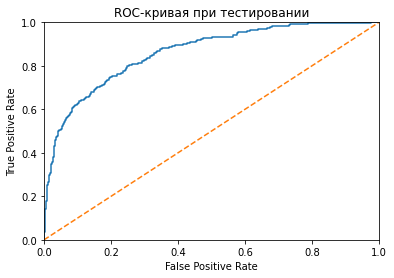

In [83]:
plt.figure()
plt.plot(fpr, tpr)
#построем кривую для случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

# применим функции plt.xlim() и plt.ylim(), чтобы установить границы осей от 0 до 1 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

#подпишем оси и добавим заголовок
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title("ROC-кривая при тестировании")
plt.show()

Вывод   
В результате тестирования, нами получено значение F1-меры выше>61, что лучше, чем 0,59. ROC-AUC, полученное при тестировании, равно 0.8609. Качество ROC-кривой очевидно выше, чем у случайной модели.

## Общий вывод
В результате подготовки данных, при помощи техники прямого кодирования в дамми-переменные были переведены столбцы с географической принадлежностью и полом. К столбцам 'CreditScore', 'Balance', 'Estimated Salary' было применено масштабирование, чтобы избежать перекоса в значимости признаков. Также были удалены избыточные для исследования данные, столбцы 'Surname' и 'CustomerID' и номер строки.   
В результате исследования данных был выделен целевой признак - столбец "Exitet". Выборка была разделена на тренировочную, валидационную и тестовую в пропорции 3:1:1. Были изучены модели случайного леса, решающего дерева и регрессии без учета дисбаланса. Лучшие результаты F1, Precision, Accuracy показала модель случайного леса, в то время, как Recall - решающее дерево. Был выявлен внушительный перекос в балансе классов.   
Для борьбы с дисбалансом были использованы методы взвешивания, увеличения и уменьшения выборки. Лучший результат F1 показала модель случайного леса взвешенных классов. Она была использована для тестирования.   
В результате тестирования получили значения F1 больше 0,61, что соответствует поставленной задаче. ROC-AUC, полученное при тестировании, равно 0.857. Качество ROC-кривой получилось значительно выше, чем у случайной модели.